In [ ]:
import random
# --- Bandit ---
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N
    expRewards = []
    for i in range(0,self.N):
      n = random.randint(1,1*N)
      expRewards.append(n)
    self.expRewards = expRewards
  def actions(self):
    result = []
    for i in range(0,self.N):
      result.append(i)
    return result
  def reward(self, action):
    result = []
    n = random.gauss(0,0.01)
    result = self.expRewards[action] + n
    return result

In [ ]:
myBandit=Bandit(N=10)

In [ ]:
def eGreedy(myBandit, epsilon, max_iteration):
  # Initialization 
  Q = [0]*myBandit.N 
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.reward(action)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action]
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

  return Q, R_avg, R

In [ ]:
Q,R_avg,R = eGreedy(myBandit, 0.1, 1000)

In [ ]:
Q

[10.000218971014698,
 2.998264761767702,
 5.002001054859172,
 8.000295851686557,
 2.9983575398656135,
 8.000425920669729,
 9.003763041630652,
 5.0024194728900895,
 0.9965550194608676,
 4.998605319702118]

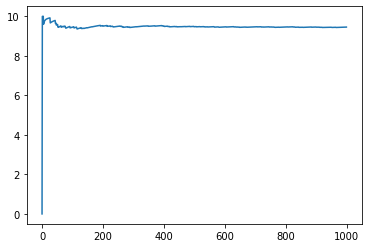

In [ ]:
import matplotlib.pyplot as plt
plt.plot(R_avg)
